### begin with import and read_csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df= pd.read_csv("Carbon_Emission_2.csv", sep= ";")
import matplotlib.pyplot as plt
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
df.head()


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


## dealing with dummy variables

In [2]:
#variables_quantitative =df.select_dtypes(include=[np.number]).drop('CarbonEmission',axis=1).columns.tolist()
variables_quantitative = [
    "Monthly Grocery Bill", "Vehicle Monthly Distance Km", 
    "Waste Bag Weekly Count", "How Long TV PC Daily Hour",
    "How Many New Clothes Monthly", "How Long Internet Daily Hour"]      #independent variables with numeric values

variables_mit_mehreren_antwortmoeglichkeiten=["Recycling" ,"Cooking_With"]    #independent variables with multiple/combination of answers

variables_for_one_hot_encoded=['Body Type','Sex','Diet','How Often Shower',
                               'Heating Energy Source','Social Activity',
                             'Frequency of Traveling by Air','Waste Bag Size','Energy efficiency']  # independent variables with single answer 

variables_transport_vehicle_type=["Transport","Vehicle Type"]   #independent variables that can/could be combined into one column

all_columns=set(variables_mit_mehreren_antwortmoeglichkeiten).union(
    variables_transport_vehicle_type,
    variables_quantitative,
    variables_for_one_hot_encoded,
    ["CarbonEmission"])
#assert set(df.columns.tolist()).difference(all_columns)==set()

     #In summary, the code combines several lists (or sets) of column names into a single set (all_columns) 
     #and then checks that all columns in the DataFrame df are included in this combined set. 
     #If any column in df is not found in all_columns, the code will raise an assertion error.

In [3]:
##create new column: 
df["Transport Vehicle Type"]=df["Vehicle Type"] #definiere neue Spalte
df.loc[df["Transport Vehicle Type"].isna(), "Transport Vehicle Type"] = df["Transport"] # Werte aus 'Transport' übernehmen, wenn 'Vehicle Type' NaN ist
#df[["Transport","Vehicle Type","Transport Vehicle Type"]]



##add variable to one-hot-encoding
if "Transport Vehicle Type" not in variables_for_one_hot_encoded: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_for_one_hot_encoded.append("Transport Vehicle Type") 

##veranschaulichen der neuen Spalten und ihrer Werte
df[["Transport","Vehicle Type","Transport Vehicle Type"]]

,Transport,Vehicle Type,Transport Vehicle Type
0,public,NaN,public
1,walk/bicycle,NaN,walk/bicycle
2,private,petrol,petrol
3,walk/bicycle,NaN,walk/bicycle
4,private,diesel,diesel
...,...,...,...
9995,private,hybrid,hybrid
9996,private,lpg,lpg
9997,walk/bicycle,NaN,walk/bicycle
9998,private,petrol,petrol


In [4]:
##create new column: 
#df["Transport Vehicle Type"]=df["Vehicle Type"] #definiere neue Spalte
#df.loc[df["Transport Vehicle Type"].isna(), "Transport Vehicle Type"] = df["Transport"] # Werte aus 'Transport' übernehmen, wenn 'Vehicle Type' NaN ist
#df[["Transport","Vehicle Type","Transport Vehicle Type"]]



##add variable to one-hot-encoding
#if "Transport Vehicle Type" not in variables_for_one_hot_encoded: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    #variables_for_one_hot_encoded.append("Transport Vehicle Type") 

##veranschaulichen der neuen Spalten und ihrer Werte
#df[["Transport","Vehicle Type","Transport Vehicle Type"]]

In [5]:
### sorting the variable into groups 
variables_for_one_hot_encoded=['Body Type','Sex','Diet','How Often Shower', 'Heating Energy Source','Social Activity','Frequency of Traveling by Air',
                               'Waste Bag Size','Energy efficiency', 'Transport Vehicle Type']
variables_quantitative = ["Monthly Grocery Bill", "Vehicle Monthly Distance Km",  "Waste Bag Weekly Count",
                          "How Long TV PC Daily Hour", "How Many New Clothes Monthly", "How Long Internet Daily Hour"]     

#manual one-hot-encoding

for variable in variables_for_one_hot_encoded:
    column_name=variable      

    ##create new column: 
    unique_values_clumn= list(df[column_name].unique())
    # Für jede einzigartige Cooking_With-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
    for item in unique_values_clumn:
        #df[str(column_name) + ": " +str(item)] = df[column_name].apply(lambda x: 1 if item in x else 0)
        df[str(column_name) + ": " + str(item)] = df[column_name].apply(lambda x: 1 if x == item else 0)


  ## it also shows a df with maximum number of columns = 60
   ##add column to variables_quantitative for lineare Regression
    list_dummy_columns=[str(column_name) + ": " +str(item) for item in unique_values_clumn][1:] #liste mit Spalten-Namen
    if list_dummy_columns[0] not in variables_quantitative: #wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
      variables_quantitative += list_dummy_columns

df.head()
#df.dtypes

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,...,Energy efficiency: No,Energy efficiency: Sometimes,Energy efficiency: Yes,Transport Vehicle Type: public,Transport Vehicle Type: walk/bicycle,Transport Vehicle Type: petrol,Transport Vehicle Type: diesel,Transport Vehicle Type: hybrid,Transport Vehicle Type: lpg,Transport Vehicle Type: electric
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,...,1,0,0,1,0,0,0,0,0,0
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,...,1,0,0,0,1,0,0,0,0,0
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,...,0,1,0,0,0,1,0,0,0,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,...,0,1,0,0,1,0,0,0,0,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,...,0,0,1,0,0,0,1,0,0,0


In [6]:
##create new columns for Recycling: 
unique_values_Recycling= set([item for sublist in df['Recycling'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Recycling-Möglichkeiten
# Für jede einzigartige Recycling-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_Recycling:
    df['Recycling '+str(item)] = df['Recycling'].apply(lambda x: 1 if item in x else 0)

##create new column for Cooking_with: 
unique_values_cooking_With= set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Cooking_With-Möglichkeiten
# Für jede einzigartige Cooking_With-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_cooking_With:
    df['Cooking With '+str(item)] = df['Cooking_With'].apply(lambda x: 1 if item in x else 0)



In [7]:
##create dummy-variables for "Cooking With":
df['Cooking With Grill'] = df['Cooking_With'].apply(lambda x: 1 if "Grill" in x else 0)
df['Cooking With Airfryer'] = df['Cooking_With'].apply(lambda x: 1 if "Airfryer" in x else 0)
#what are the values for the variables "Cooking With Airfryer","Cooking With Grill"
print(df.groupby(["Cooking With Airfryer","Cooking With Grill"]).size())
#all people where "Cooking With" is Grill
df[df["Cooking With Grill"] == 0][["Cooking_With", "Cooking With Grill", "Cooking With Airfryer"]]

Cooking With Airfryer  Cooking With Grill
0                      0                     5008
1                      1                     4992
dtype: int64


,Cooking_With,Cooking With Grill,Cooking With Airfryer
0,"['Stove', 'Oven']",0,0
1,"['Stove', 'Microwave']",0,0
2,"['Oven', 'Microwave']",0,0
4,['Oven'],0,0
5,"['Stove', 'Oven', 'Microwave']",0,0
...,...,...,...
9991,['Microwave'],0,0
9993,['Oven'],0,0
9994,"['Oven', 'Microwave']",0,0
9995,['Microwave'],0,0


In [8]:
df.head(60)
# Define the specific columns you want to print
columns_to_select = ['Cooking With Grill', 'Cooking With Airfryer']

# Select rows from index 60 to 120 and specific columns
selected_rows = df.loc[80:100, columns_to_select]

# Print the selected rows
print(selected_rows)

     Cooking With Grill  Cooking With Airfryer
80                    1                      1
81                    1                      1
82                    0                      0
83                    1                      1
84                    0                      0
85                    1                      1
86                    1                      1
87                    0                      0
88                    0                      0
89                    0                      0
90                    1                      1
91                    0                      0
92                    0                      0
93                    0                      0
94                    1                      1
95                    0                      0
96                    0                      0
97                    1                      1
98                    1                      1
99                    0                      0
100          

## change display settings to show all columns:

In [9]:
# Change display settings to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df)


        Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0      overweight  female  pescatarian            daily                  coal   
1           obese  female   vegetarian  less frequently           natural gas   
2      overweight    male     omnivore  more frequently                  wood   
3      overweight    male     omnivore      twice a day                  wood   
4           obese  female   vegetarian            daily                  coal   
...           ...     ...          ...              ...                   ...   
9995        obese    male     omnivore      twice a day                  coal   
9996       normal  female        vegan      twice a day                  coal   
9997   overweight  female   vegetarian            daily           electricity   
9998  underweight    male        vegan  more frequently                  coal   
9999        obese    male  pescatarian      twice a day                  wood   

         Transport Vehicle 

In [10]:
# x= [ "Sex: female","Sex: male","How Many New Clothes Monthly","Vehicle Monthly Distance Km","Waste Bag Weekly Count","Monthly Grocery Bill","How Long Internet Daily Hour",
#    "Transport Vehicle Type: electric","Transport Vehicle Type: lpg","Transport Vehicle Type: hybrid","Transport Vehicle Type: diesel",
 #   "Transport Vehicle Type: petrol","Transport Vehicle Type: walk/bicycle","Transport Vehicle Type: public",
  #  "Frequency of Traveling by Air: frequently","Frequency of Traveling by Air: rarely","Frequency of Traveling by Air: never","Frequency of Traveling by Air: very frequently",
   # "Heating Energy Source: coal","Heating Energy Source: natural gas","Heating Energy Source: wood","Heating Energy Source: electricity",
    #"Body Type: overweight","Body Type: obese","Body Type: underweight","Body Type: normal"]

In [11]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission,Transport Vehicle Type,Body Type: overweight,Body Type: obese,Body Type: underweight,Body Type: normal,Sex: female,Sex: male,Diet: pescatarian,Diet: vegetarian,Diet: omnivore,Diet: vegan,How Often Shower: daily,How Often Shower: less frequently,How Often Shower: more frequently,How Often Shower: twice a day,Heating Energy Source: coal,Heating Energy Source: natural gas,Heating Energy Source: wood,Heating Energy Source: electricity,Social Activity: often,Social Activity: never,Social Activity: sometimes,Frequency of Traveling by Air: frequently,Frequency of Traveling by Air: rarely,Frequency of Traveling by Air: never,Frequency of Traveling by Air: very frequently,Waste Bag Size: large,Waste Bag Size: extra large,Waste Bag Size: small,Waste Bag Size: medium,Energy efficiency: No,Energy efficiency: Sometimes,Energy efficiency: Yes,Transport Vehicle Type: public,Transport Vehicle Type: walk/bicycle,Transport Vehicle Type: petrol,Transport Vehicle Type: diesel,Transport Vehicle Type: hybrid,Transport Vehicle Type: lpg,Transport Vehicle Type: electric,Recycling Glass,Recycling Plastic,Recycling Paper,Recycling Metal,Cooking With Stove,Cooking With Microwave,Cooking With Airfryer,Cooking With Grill,Cooking With Oven
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,public,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,walk/bicycle,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,petrol,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,walk/bicycle,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,diesel,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [12]:
#y= df["CarbonEmission"]
#x=df[["Monthly Grocery Bill", "Cooking With Stove", "Cooking With Oven", "Cooking With Grill", "Cooking With Microwave", "Cooking With Airfryer", " Recycling Metal", "Recycling Glass", "Recycling Plastic", "Recycling Paper", "Transport Vehicle Type: lpg", "Transport Vehicle Type: electric", "Transport Vehicle Type: diesel", "Transport Vehicle Type: hybrid", "Transport Vehicle Type: walk/bicycle", "Transport Vehicle Type: petrol","Transport Vehicle Type: public", "Energy efficiency: Sometimes", "Energy efficiency: Yes","Waste Bag Size: medium", "Energy efficiency: No","Waste Bag Size: extra large", "Waste Bag Size: small", "Frequency of Traveling by Air: very frequently", "Waste Bag Size: large","Frequency of Traveling by Air: never","Frequency of Traveling by Air: rarely"," Frequency of Traveling by Air: frequently ", "Social Activity: never", "Social Activity: sometimes", "Heating Energy Source: electricity", "Social Activity: often", "Heating Energy Source: natural gas", "Heating Energy Source: wood", "How Often Shower: twice a day", "Heating Energy Source: coal", "How Often Shower: less frequently", "How Often Shower: more frequently","Diet: vegetarian", "Diet: omnivore", "Diet: vegan", "How Often Shower: daily","Body Type: overweight", "Body Type: obese", "Body Type: normal", "Sex: female", "Sex: male","Diet: pescatarian", "Body Type: underweight" "Vehicle Monthly Distance Km", "Waste Bag Weekly Count", "How Long TV PC Daily Hour", "How Many New Clothes Monthly", "How Long Internet Daily Hour"]]
#x.dtypes

## train_test_split 

In [13]:
from sklearn.model_selection import train_test_split
y = df['CarbonEmission']

# List of columns to exclude
exclude_columns = ["Body Type", "Body Type: overweight","Sex: female", "Diet: pescatarian", "How Often Shower: daily", "Heating Energy Source: coal",
                   "Social Activity: often", "Frequency of Traveling by Air: frequently", "Waste Bag Size: large", "Energy efficiency: No",
                   "Transport Vehicle Type: public",
                   "Sex",	"Diet",	"How Often Shower",	"Heating Energy Source", "Transport", "Vehicle Type", "Social Activity", 
   "Frequency of Traveling by Air","Waste Bag Size", "Energy efficiency", "Recycling", "Cooking_With", "Transport Vehicle Type"]

# Define feature set by dropping the excluded columns
X = df.drop(columns=exclude_columns + ['CarbonEmission'])

# Print the resulting feature set to verify
#print(X)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 44)
X_test shape: (2000, 44)
y_train shape: (8000,)
y_test shape: (2000,)


## Lazy_Predict

In [15]:
from lazypredict.Supervised import LazyRegressor
import warnings
warnings.filterwarnings("ignore")  # To ignore warnings during the model fitting

# Initialize LazyRegressor
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit LazyRegressor on training data
models, predictions = lazy_regressor.fit(X_train, X_test, y_train, y_test)

# Display results
print(models)

 98%|█████████▊| 41/42 [01:20<00:01,  1.52s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 44
[LightGBM] [Info] Start training from score 2263.556125


100%|██████████| 42/42 [01:20<00:00,  1.92s/it]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
LGBMRegressor                                0.98       0.98  152.40   
HistGradientBoostingRegressor                0.98       0.98  152.52   
XGBRegressor                                 0.97       0.97  166.15   
MLPRegressor                                 0.96       0.96  199.88   
GradientBoostingRegressor                    0.95       0.95  220.99   
Lasso                                        0.93       0.93  261.02   
LassoLars                                    0.93       0.93  261.02   
LassoCV                                      0.93       0.93  261.08   
LassoLarsCV                                  0.93       0.93  261.11   
LarsCV                                       0.93       0.93  261.11   
BayesianRidge                                0.93       0.93  261.22   
RidgeCV                                      0.93       0.93  26

## LGBM_Regressor

In [16]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df['CarbonEmission']

# List of columns to exclude
exclude_columns = ["Body Type", "Body Type: overweight","Sex: female", "Diet: pescatarian", "How Often Shower: daily", "Heating Energy Source: coal",
                   "Social Activity: often", "Frequency of Traveling by Air: frequently", "Waste Bag Size: large", "Energy efficiency: No",
                   "Transport Vehicle Type: public","Sex",	"Diet",	"How Often Shower",	"Heating Energy Source", "Transport", "Vehicle Type", 
                   "Social Activity", "Frequency of Traveling by Air","Waste Bag Size", "Energy efficiency", "Recycling", "Cooking_With", 
                   "Transport Vehicle Type"]

# Define feature set by dropping the excluded columns
X = df.drop(columns=exclude_columns + ['CarbonEmission'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
#Train the LGBMRegressor:
#lgbm_regressor = lgb.LGBMRegressor()  
#lgbm_regressor.fit(X_train, y_train)    --> error: LightGBMError: Do not support special JSON characters in feature name. therefore we need to rename
                                                   # columns. characters such as " " are not accepted!    


# Clean column names function
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    df.columns = df.columns.str.replace(r'\s+', '_', regex=True)    # Replace spaces with underscores
    return df

# Clean column names for both X_train and X_test
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

# Verify cleaned column names
#print(X_train.columns.tolist())   --> now all columns have "_" instead of space between two words 

# Initialize and train the model   ---> after renaming the columns there is no error
lgbm_regressor = lgb.LGBMRegressor()
lgbm_regressor.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')   #RMSE: 157.67141019205152 might not be acceptable in some context ---> please check it out !!


# Print the R-squared score
r2 = lgbm_regressor.score(X_test, y_test)
print(f'R squared: {r2}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 44
[LightGBM] [Info] Start training from score 2265.283000
RMSE: 157.67141019205152
R squared: 0.9759747167452437


## LGBM test on the final selected features:

In [19]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df['CarbonEmission']
variables = [ "Sex: female","Sex: male","How Many New Clothes Monthly","Vehicle Monthly Distance Km","Waste Bag Weekly Count","Monthly Grocery Bill","How Long Internet Daily Hour",
  "Transport Vehicle Type: electric","Transport Vehicle Type: lpg","Transport Vehicle Type: hybrid","Transport Vehicle Type: diesel",
  "Transport Vehicle Type: petrol","Transport Vehicle Type: walk/bicycle","Transport Vehicle Type: public",
   "Frequency of Traveling by Air: frequently","Frequency of Traveling by Air: rarely","Frequency of Traveling by Air: never","Frequency of Traveling by Air: very frequently",
   "Heating Energy Source: coal","Heating Energy Source: natural gas","Heating Energy Source: wood","Heating Energy Source: electricity",
    "Body Type: overweight","Body Type: obese","Body Type: underweight","Body Type: normal"]
X = df[variables]
y = df['CarbonEmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Clean column names function
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    df.columns = df.columns.str.replace(r'\s+', '_', regex=True)    # Replace spaces with underscores
    return df

# Clean column names for both X_train and X_test
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

# Verify cleaned column names
#print(X_train.columns.tolist())   --> now all columns have "_" instead of space between two words 

# Initialize and train the model   ---> after renaming the columns there is no error
lgbm_regressor = lgb.LGBMRegressor()
lgbm_regressor.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')   #RMSE: 157.67141019205152 might not be acceptable in some context ---> please check it out !!


# Print the R-squared score
r2 = lgbm_regressor.score(X_test, y_test)
print(f'R squared: {r2}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 26
[LightGBM] [Info] Start training from score 2265.283000
RMSE: 255.0652573825556
R squared: 0.9371268489064366


## Cross-Validation to test over-fitting

In [22]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the target variable and feature variables
y = df['CarbonEmission']
variables = ["Sex: female", "Sex: male", "How Many New Clothes Monthly", "Vehicle Monthly Distance Km", 
             "Waste Bag Weekly Count", "Monthly Grocery Bill", "How Long Internet Daily Hour",
             "Transport Vehicle Type: electric", "Transport Vehicle Type: lpg", "Transport Vehicle Type: hybrid",
             "Transport Vehicle Type: diesel", "Transport Vehicle Type: petrol", "Transport Vehicle Type: walk/bicycle",
             "Transport Vehicle Type: public", "Frequency of Traveling by Air: frequently", 
             "Frequency of Traveling by Air: rarely", "Frequency of Traveling by Air: never", 
             "Frequency of Traveling by Air: very frequently", "Heating Energy Source: coal", 
             "Heating Energy Source: natural gas", "Heating Energy Source: wood", "Heating Energy Source: electricity", 
             "Body Type: overweight", "Body Type: obese", "Body Type: underweight", "Body Type: normal"]

# Clean feature names by replacing special characters
cleaned_variables = [var.replace(":", "_").replace(" ", "_") for var in variables]

# Rename the columns in the DataFrame
df_cleaned = df.rename(columns=dict(zip(variables, cleaned_variables)))

# Select the cleaned features (X)
X = df_cleaned[cleaned_variables]

# Define the LightGBM model
model = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100
)

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring=scorer)

# Convert the negative MSE to positive RMSE
cv_rmse = np.sqrt(-cv_results)

print(f'Cross-Validation RMSE: {cv_rmse}')
print(f'Mean RMSE: {cv_rmse.mean()}')
print(f'Standard Deviation of RMSE: {cv_rmse.std()}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 26
[LightGBM] [Info] Start training from score 2263.556125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 26
[LightGBM] [Info] Start training from score 2270.368125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 26
[LightGBM] [Info] Start tra

## Checking for Normality:

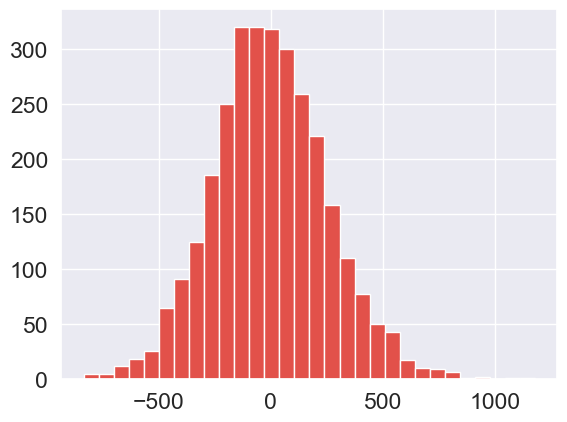

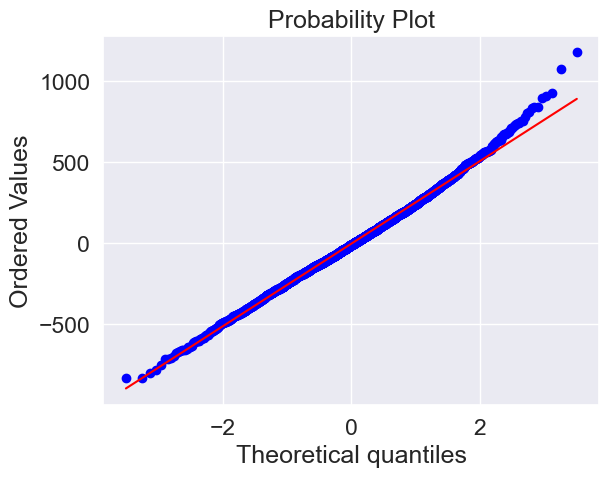

Statistics=0.996, p=0.000
Residuals do not look normally distributed


In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot histogram of residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# Shapiro-Wilk test
stat, p = stats.shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Residuals look normally distributed')
else:
    print('Residuals do not look normally distributed')

# Feature Selection:

## 1. Feature Importance from a Tree-Based Model_ using a LightGBM regressor

In [24]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df['CarbonEmission']

# List of columns to exclude
exclude_columns = ["Body Type", "Body Type: overweight","Sex: female", "Diet: pescatarian", "How Often Shower: daily", "Heating Energy Source: coal",
                   "Social Activity: often", "Frequency of Traveling by Air: frequently", "Waste Bag Size: large", "Energy efficiency: No",
                   "Transport Vehicle Type: public","Sex",	"Diet",	"How Often Shower",	"Heating Energy Source", "Transport", "Vehicle Type", 
                   "Social Activity", "Frequency of Traveling by Air","Waste Bag Size", "Energy efficiency", "Recycling", "Cooking_With", 
                   "Transport Vehicle Type"]

# Define feature set by dropping the excluded columns
X = df.drop(columns=exclude_columns + ['CarbonEmission'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 44
[LightGBM] [Info] Start training from score 2265.283000
                                 Feature  Importance
4           How Many New Clothes Monthly         311
1            Vehicle Monthly Distance Km         293
2                 Waste Bag Weekly Count         243
0                   Monthly Grocery Bill         181
9                              Sex: male         133
5           How Long Internet Daily Hour         123
22  Frequency of Traveling by Air: never         116
30        Transport Vehicle Type: petrol          96
6                       Body Type: obese          95
18    Heating Energy Source: electricity          87


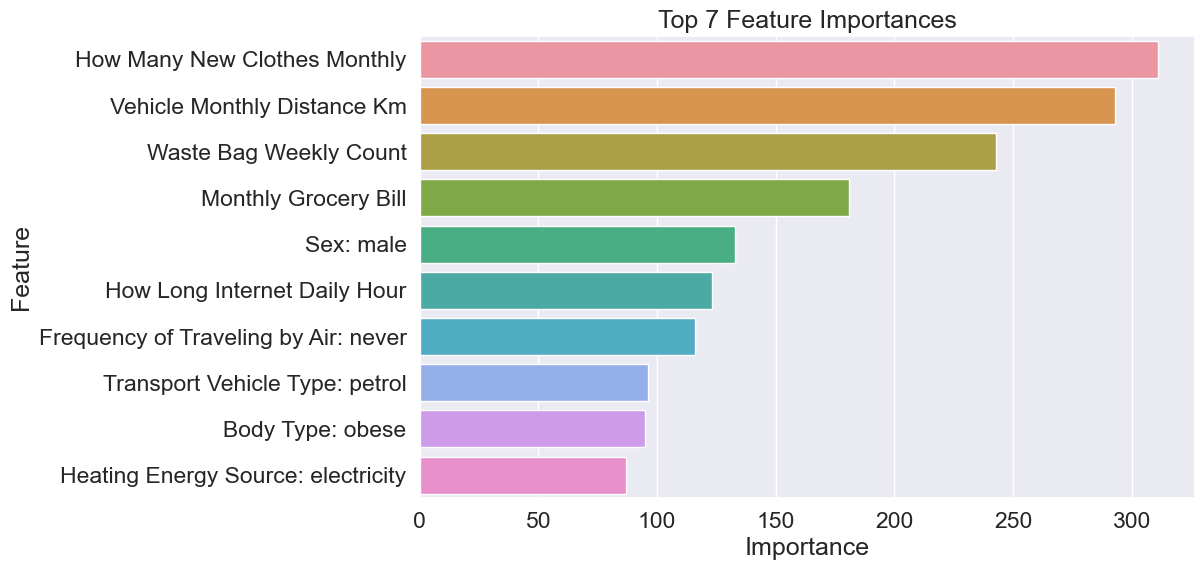

In [25]:
# Clean column names function
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    df.columns = df.columns.str.replace(r'\s+', '_', regex=True)    # Replace spaces with underscores
    return df

# Clean column names for both X_train and X_test
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

# Initialize and train the model
lgbm_regressor = lgb.LGBMRegressor()
lgbm_regressor.fit(X_train, y_train)

# Get feature importances
importances = lgbm_regressor.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 7 features
top_7_features = importance_df.head(10)  #here we can change the number of variables that we want
print(top_7_features)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_7_features)
plt.title('Top 7 Feature Importances')
plt.show()



## 2. with Recursive Feature Elimination (RFE)

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Initialize RFE with the model and number of features to select
rfe = RFE(model, n_features_to_select=20) # change the number of features here

# Fit RFE
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# Transform the dataset to include only the selected features
X_selected = X[selected_features]

Selected features: Index(['Body Type: obese', 'Body Type: underweight', 'Body Type: normal',
       'Sex: male', 'Diet: omnivore', 'Heating Energy Source: natural gas',
       'Heating Energy Source: wood', 'Heating Energy Source: electricity',
       'Frequency of Traveling by Air: rarely',
       'Frequency of Traveling by Air: never',
       'Frequency of Traveling by Air: very frequently',
       'Waste Bag Size: extra large', 'Waste Bag Size: small',
       'Waste Bag Size: medium', 'Transport Vehicle Type: petrol',
       'Transport Vehicle Type: diesel', 'Transport Vehicle Type: hybrid',
       'Transport Vehicle Type: lpg', 'Recycling Paper', 'Recycling Metal'],
      dtype='object')


## 3. with Lasso Regression

In [39]:
from sklearn.linear_model import LassoCV
import numpy as np

# Initialize the model
lasso = LassoCV(cv=5, random_state=42)

# Fit the model
lasso.fit(X, y)

# Get the coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

# Select the top 7 features
top_7_features = coef.abs().sort_values(ascending=False).head(20).index #---> change the number of features from here
print("Top 7 features:", top_7_features)

# Transform the dataset to include only the selected features
X_selected = X[top_7_features]

# Now you can use X_selected for further modeling

Top 7 features: Index(['How Many New Clothes Monthly', 'Monthly Grocery Bill',
       'Vehicle Monthly Distance Km', 'Cooking With Airfryer',
       'Cooking With Grill', 'Waste Bag Size: extra large',
       'Waste Bag Size: small', 'Waste Bag Size: medium',
       'Energy efficiency: Sometimes', 'Energy efficiency: Yes',
       'Transport Vehicle Type: walk/bicycle',
       'Transport Vehicle Type: petrol', 'Transport Vehicle Type: diesel',
       'Transport Vehicle Type: hybrid', 'Transport Vehicle Type: lpg',
       'Frequency of Traveling by Air: very frequently', 'Recycling Glass',
       'Recycling Plastic', 'Recycling Paper', 'Recycling Metal'],
      dtype='object')


## 4. Combined model: 
#### Using LightGBM to Get Feature Importances + Using RFE with LightGBM

In [28]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df['CarbonEmission']

# List of columns to exclude
exclude_columns = ["Body Type", "Body Type: overweight","Sex: female", "Diet: pescatarian", "How Often Shower: daily", "Heating Energy Source: coal",
                   "Social Activity: often", "Frequency of Traveling by Air: frequently", "Waste Bag Size: large", "Energy efficiency: No",
                   "Transport Vehicle Type: public","Sex",	"Diet",	"How Often Shower",	"Heating Energy Source", "Transport", "Vehicle Type", 
                   "Social Activity", "Frequency of Traveling by Air","Waste Bag Size", "Energy efficiency", "Recycling", "Cooking_With", 
                   "Transport Vehicle Type"]

# Define feature set by dropping the excluded columns
X = df.drop(columns=exclude_columns + ['CarbonEmission'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 44
[LightGBM] [Info] Start training from score 2265.283000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 44
[LightGBM] [Info] Start training from score 2265.283000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

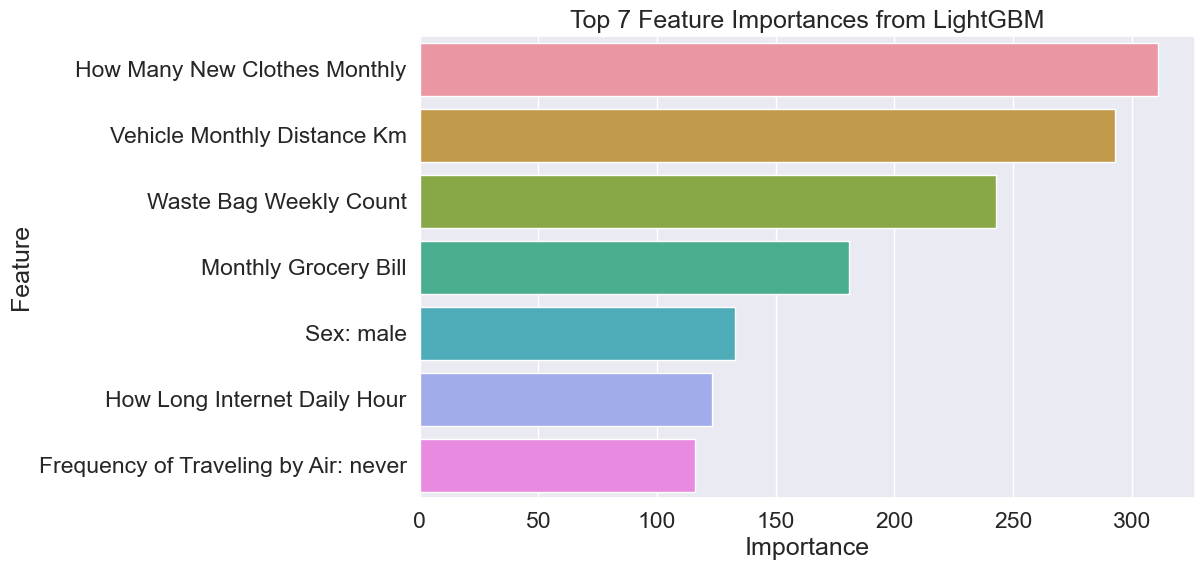

Selected Features by RFE: Index(['Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Body Type: obese'],
      dtype='object')


In [29]:
# Clean column names function
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    df.columns = df.columns.str.replace(r'\s+', '_', regex=True)    # Replace spaces with underscores
    return df

# Clean column names for both X_train and X_test
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

# Initialize and train the model
lgbm_regressor = lgb.LGBMRegressor()
lgbm_regressor.fit(X_train, y_train)

# Get feature importances from LightGBM
importances = lgbm_regressor.feature_importances_
feature_names = X.columns

# Create a DataFrame for LightGBM feature importances
lgbm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Initialize RFE with LightGBM as the estimator
rfe = RFE(estimator=lgbm_regressor, n_features_to_select=7)
rfe.fit(X_train, y_train)

# Get the selected features from RFE
rfe_selected_features = X.columns[rfe.support_]

# Combine results: Features selected by RFE and top features from LightGBM
combined_features = set(rfe_selected_features).union(lgbm_importance_df.head(7)['Feature'])

# Print combined important features
print("Combined Important Features:", combined_features)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgbm_importance_df.head(7))
plt.title('Top 7 Feature Importances from LightGBM')
plt.show()

# Print selected features by RFE
print("Selected Features by RFE:", rfe_selected_features)

## correlation model

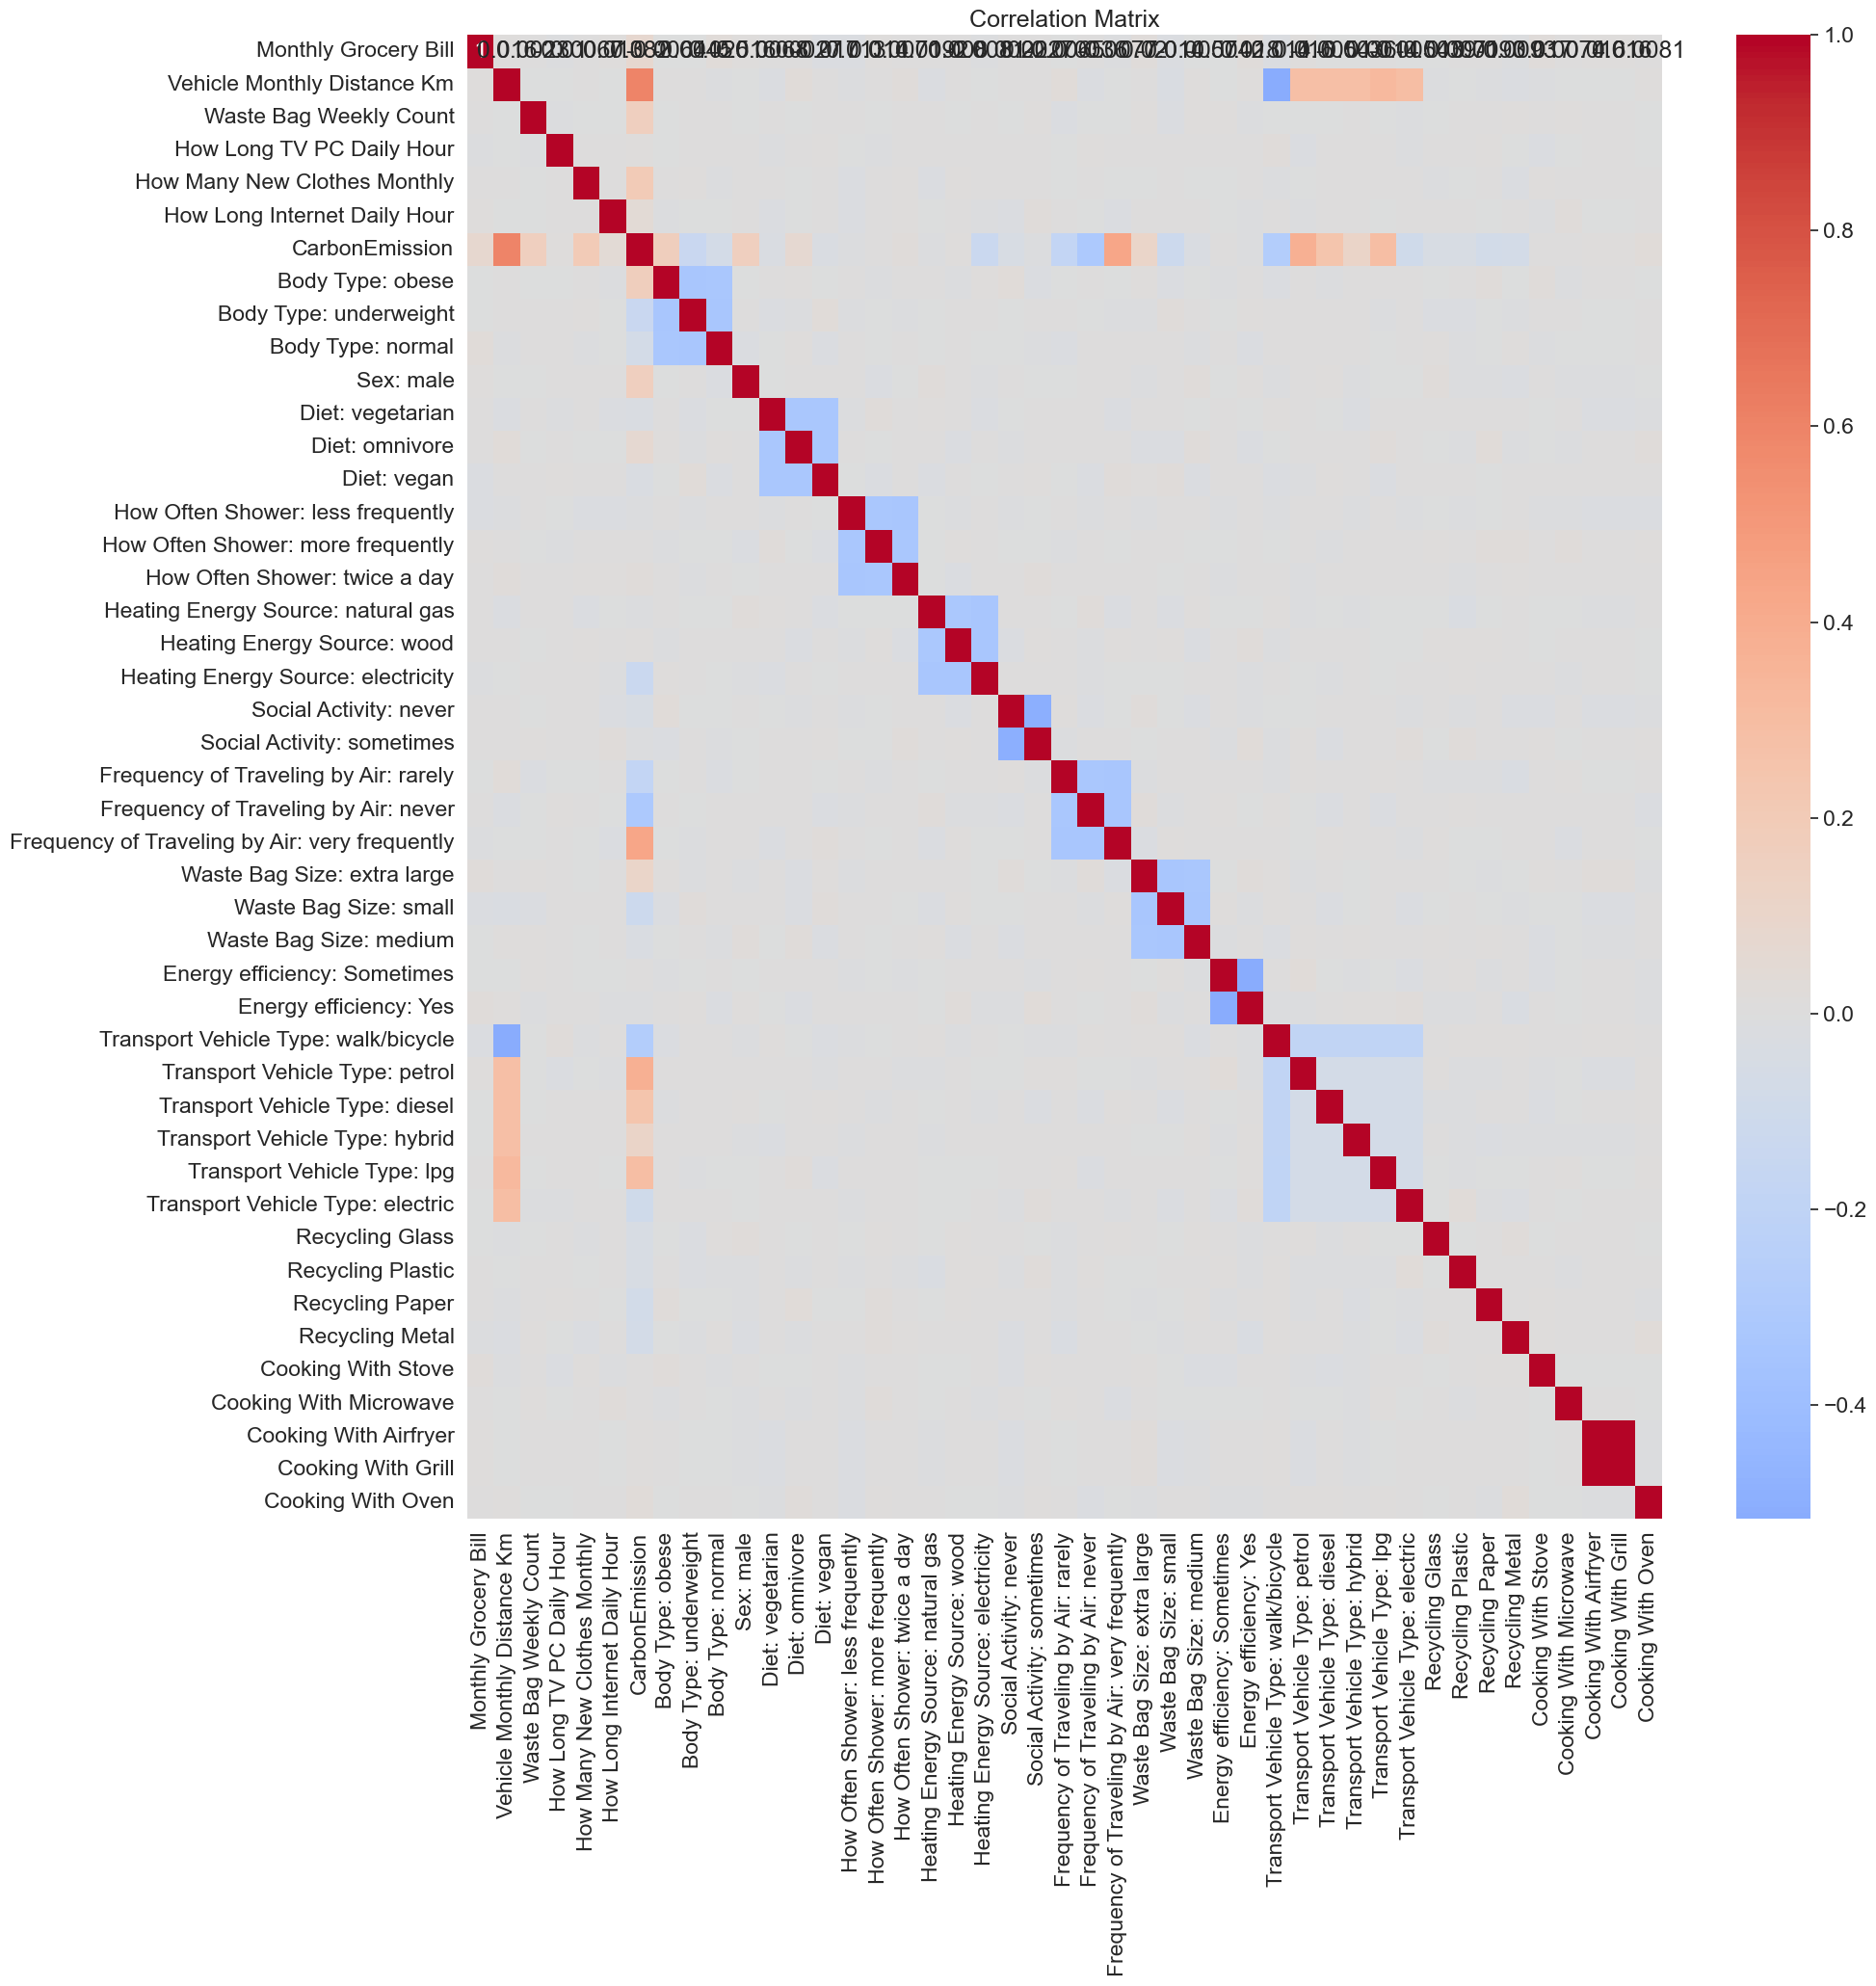

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

exclude_columns = ["Body Type", "Body Type: overweight","Sex: female", "Diet: pescatarian", "How Often Shower: daily", "Heating Energy Source: coal",
                   "Social Activity: often", "Frequency of Traveling by Air: frequently", "Waste Bag Size: large", "Energy efficiency: No",
                   "Transport Vehicle Type: public",
                   "Sex",	"Diet",	"How Often Shower",	"Heating Energy Source", "Transport", "Vehicle Type", "Social Activity", 
   "Frequency of Traveling by Air","Waste Bag Size", "Energy efficiency", "Recycling", "Cooking_With", "Transport Vehicle Type"]

df_numerical = df.drop(exclude_columns, axis=1)   #important to write axis=1, otherwise --> error
##correlations = df.drop(exclude_columns,axis=1).corr() 

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()


# Print the correlation matrix
##print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))       #sets the figure size to 20 inches by 20 inches.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## most important features by using correlation

In [31]:
import pandas as pd
import numpy as np



# Assuming your target variable is 'CarbonEmission'
target_variable = 'CarbonEmission'

# Identify columns with string values and drop them
string_columns = df.select_dtypes(include=['object']).columns   # INTERESTING --> select object /String data type --> 
                                                                 #which means we dont need to make a long list of non_Numeric columns

df_numerical = df.drop(columns=string_columns, axis=1)

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()

# Get the absolute correlation of each feature with the target variable
correlation_with_target = correlation_matrix[target_variable].abs()    #اینجا قدر مطلق میگیره

# Drop the target variable from the correlation series
correlation_with_target = correlation_with_target.drop(target_variable)

# Sort the features by correlation with the target variable
sorted_features = correlation_with_target.sort_values(ascending=False)

# Select the top 7 features
top_7_features = sorted_features.head(15)                     #set the number from here

# Print the top 7 features
print("Top 7 features based on correlation with the target variable:")
print(top_7_features)

# Optional: Create a new DataFrame with only the top 7 features and the target variable
df_top_7 = df_numerical[top_7_features.index.to_list() + [target_variable]]
print(df_top_7.head())

Top 7 features based on correlation with the target variable:
Vehicle Monthly Distance Km                      0.59
Frequency of Traveling by Air: very frequently   0.43
Transport Vehicle Type: petrol                   0.38
Frequency of Traveling by Air: never             0.31
Transport Vehicle Type: lpg                      0.29
Transport Vehicle Type: walk/bicycle             0.28
Transport Vehicle Type: diesel                   0.24
Transport Vehicle Type: public                   0.21
How Many New Clothes Monthly                     0.20
Frequency of Traveling by Air: rarely            0.18
Body Type: obese                                 0.17
Sex: male                                        0.16
Sex: female                                      0.16
Waste Bag Weekly Count                           0.16
Body Type: underweight                           0.14
Name: CarbonEmission, dtype: float64
   Vehicle Monthly Distance Km  \
0                          210   
1                      

## Linear REgression

In [ ]:
#p = sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

### Linearity

In [32]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

y = df['CarbonEmission']

# List of columns to exclude
exclude_columns = ["Body Type", "Body Type: overweight","Sex: female", "Diet: pescatarian", "How Often Shower: daily", "Heating Energy Source: coal",
                   "Social Activity: often", "Frequency of Traveling by Air: frequently", "Waste Bag Size: large", "Energy efficiency: No",
                   "Transport Vehicle Type: public","Sex",	"Diet",	"How Often Shower",	"Heating Energy Source", "Transport", "Vehicle Type", 
                   "Social Activity", "Frequency of Traveling by Air","Waste Bag Size", "Energy efficiency", "Recycling", "Cooking_With", 
                   "Transport Vehicle Type"]

# Define feature set by dropping the excluded columns
X = df.drop(columns=exclude_columns + ['CarbonEmission'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#p = sns.pairplot(df, X, y, size=7, aspect=0.7)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [33]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.93452573905509


In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#T = sc.fit_transform(X)

### Mean of Residuals

In [34]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))  # if it is very close to zero, it means the result is very good!

Mean of Residuals 5.176212002489982e-06


### Normality (of error terms/residuals)

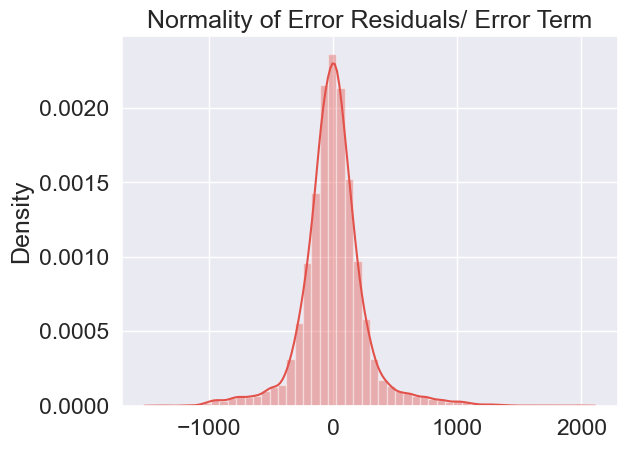

In [35]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of Error Residuals/ Error Term')

## Random Forest; because it is cool ;)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rand_far = RandomForestRegressor(random_state=0)
rand_far.fit(X_train,y_train)
rand_far_y_pred = rand_far.predict(X_train)
print("Accuracy: {}".format(rand_far.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rand_far_y_pred)))


Accuracy: 0.9871840916865656
R squared: 0.9871840916865656


## decision tree; because it is also cool ;)



In [37]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train,y_train)
decision_tree_y_pred = decision_tree.predict(X_train)
print("Accuracy: {}".format(decision_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=decision_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


## other cool models ;)